### Question 6:Principal Component Analysis
**Objective** - write code in python to perform PCA and understand why we need such unsupervised learning methods.

**Understanding the Importance of PCA**

Imagine you're trying to decide whether to invest in a stock. To make an informed decision, you collect a dataset from the NSE or Bombay Stock Exchange. You initially think it will be straightforward—just pick a stock with low risk, high returns, and low volatility. Simple, right?

But once you open the dataset, you’re faced with a challenge: hundreds of features that previous investors considered in their decisions. Now the task feels overwhelming.

This is where Principal Component Analysis (PCA) becomes essential.

PCA helps by reducing the complexity of your data. It identifies the most important dimensions—the features that explain most of the variation in the dataset. These new dimensions (called principal components) are independent of each other (i.e., they have low covariance) and capture the maximum variance possible.

In many real-world cases, just the top 10 principal components can explain more than 90% of the total variance that was originally spread across hundreds of features. This means that we can significantly reduce the number of features (and hence the computational load) with only a small compromise in information.




In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip
from io import StringIO

with open('data/class.tsv', 'r') as file:
    er_status = pd.read_csv(file, sep='\t', header=None)[0].values

with gzip.open('data/columns.tsv.gz', 'rt') as file:
    valid_lines = [line for line in file if not line.startswith('#')]
gene_info = pd.read_csv(StringIO(''.join(valid_lines)), sep='\t')

with gzip.open('data/filtered.tsv.gz', 'rt') as file:
    expr_matrix = pd.read_csv(file, sep='\t')

expr_matrix.columns = expr_matrix.columns.astype(str).str.strip()

xbp1_gene_id = 4404
gata3_gene_id = gene_info.loc[gene_info['GeneSymbol'] == 'GATA3', 'ID'].values[0]

xbp1_values = expr_matrix[str(xbp1_gene_id)].values
gata3_values = expr_matrix[str(gata3_gene_id)].values

sample_colors = ['red' if status == 1 else 'black' for status in er_status]

#PCA implementation
def perform_pca(X):
    X_centered = X - np.mean(X, axis=0)
    cov = np.cov(X_centered, rowvar=False)
    eigen_vals, eigen_vecs = np.linalg.eigh(cov)
    sorted_indices = np.argsort(eigen_vals)[::-1]
    eigen_vals = eigen_vals[sorted_indices]
    eigen_vecs = eigen_vecs[:, sorted_indices]
    return eigen_vecs, eigen_vals, X_centered


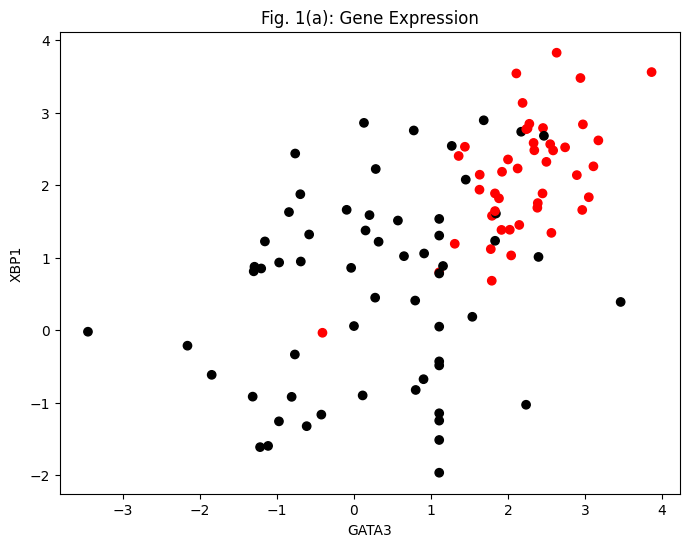

In [31]:
# Figure - 1(a) Scatter plot of xbp1 vs gata3

plt.figure(figsize=(8, 6))
plt.scatter(gata3_expression, xbp1_expression, c=colors)
plt.xlabel('GATA3')
plt.ylabel('XBP1')
plt.title('Fig. 1(a): Gene Expression')
plt.savefig('figure_1a.png')
plt.show()

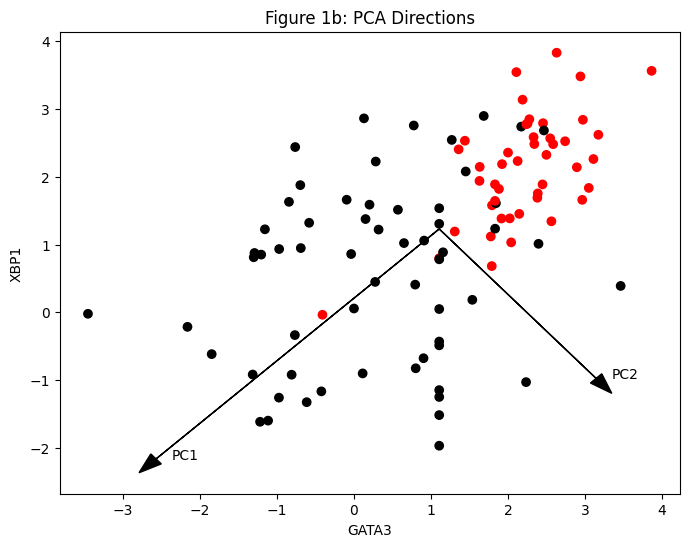

In [32]:
# Figure 1(b)
x = np.column_stack((gata3_expression, xbp1_expression))

eigenvectors, eigenvalues, x_centered = perform_pca(x)
pc1 = eigenvectors[:, 0]
pc2 = eigenvectors[:, 1]

# projections on the principal components - just the matrix multiplication of principal component vector and the original matrix (not the covariance one)
projection_pc1 = np.dot(x_centered, pc1)
projection_pc2 = np.dot(x_centered, pc2)

plt.figure(figsize=(8, 6))
plt.scatter(gata3_expression, xbp1_expression, c=colors)

# Plotting the principal components directions
mean_gata3 = np.mean(gata3_expression)
mean_xbp1 = np.mean(xbp1_expression)
plt.arrow(mean_gata3, mean_xbp1, pc1[0]*5, pc1[1]*5, head_width=0.2, head_length=0.3, fc='black', ec='black')
plt.arrow(mean_gata3, mean_xbp1, pc2[0] * 3, pc2[1] * 3, head_width=0.2, head_length=0.3, fc='black', ec='black')

plt.text(mean_gata3 + pc1[0] * 5 + 0.2, mean_xbp1 + pc1[1] * 5, 'PC1')
plt.text(mean_gata3 + pc2[0] * 3 + 0.2, mean_xbp1 + pc2[1] * 3, 'PC2')

plt.xlabel('GATA3')
plt.ylabel('XBP1')
plt.title('Figure 1b: PCA Directions')
plt.savefig('figure_1b.png')
plt.show()

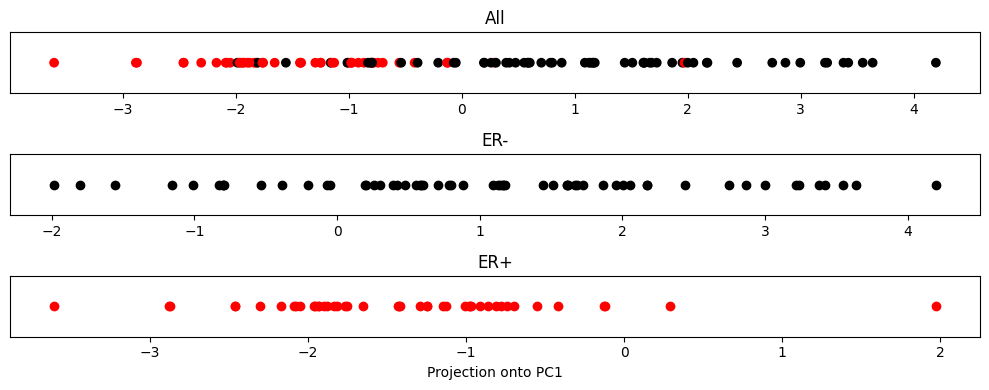

Variance explained by PC1: 0.7792
Variance explained by PC2: 0.2208


In [33]:
# Figure-(c) Projection on PC1

# Separate ER+ and ER- samples
er_pos_pc1 = projection_pc1[labels == 1]
er_neg_pc1 = projection_pc1[labels == 0]

# Create Figure 1c
plt.figure(figsize=(10, 4))

# All samples
plt.subplot(3, 1, 1)
plt.scatter(projection_pc1, np.zeros_like(projection_pc1), c=colors)
plt.yticks([])
plt.title('All')

# ER- samples
plt.subplot(3, 1, 2)
plt.scatter(er_neg_pc1, np.zeros_like(er_neg_pc1), c='black')
plt.yticks([])
plt.title('ER-')

# ER+ samples
plt.subplot(3, 1, 3)
plt.scatter(er_pos_pc1, np.zeros_like(er_pos_pc1), c='red')
plt.yticks([])
plt.title('ER+')
plt.xlabel('Projection onto PC1')

plt.tight_layout()
plt.savefig('figure_1c.png')
plt.show()

# Calculate and print variance explained
print(f"Variance explained by PC1: {eigenvalues[0]/sum(eigenvalues):.4f}")
print(f"Variance explained by PC2: {eigenvalues[1]/sum(eigenvalues):.4f}")
